In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data= pd.read_csv('/content/drive/MyDrive/Wine_clust.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
#checking for null values
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [9]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [8]:
data.shape

(178, 13)

In [10]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
## K mean clustering

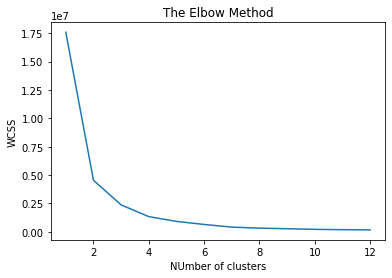

In [14]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1, 13):
    kmeans= KMeans(n_clusters=i, init= 'k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13), wcss)
plt.title('The Elbow Method')
plt.xlabel('NUmber of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans= KMeans(n_clusters=3, init= 'k-means++', random_state=42)
y_kmeans= kmeans.fit_predict(data)

In [16]:

y_kmeans

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [21]:
data1=np.array(data)

<function matplotlib.pyplot.show(*args, **kw)>

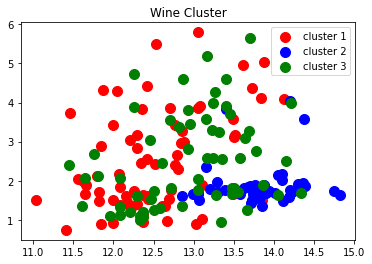

In [24]:
plt.scatter(data1[y_Kmeans==0,0],data1[y_Kmeans==0,1],s=100,c='red',label='cluster 1')
plt.scatter(data1[y_Kmeans==1,0],data1[y_Kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(data1[y_Kmeans==2,0],data1[y_Kmeans==2,1],s=100,c='green',label='cluster 3')
plt.title('Wine Cluster')
plt.legend()
plt.show

In [25]:
#silhouette score
from sklearn.metrics import silhouette_score

In [27]:
sil_avg=silhouette_score(data1,y_Kmeans)


In [28]:
print(sil_avg)

0.571138193786884


**Dendogram**

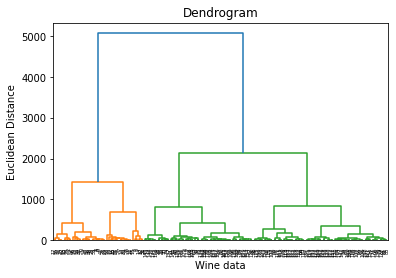

In [32]:
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(data1, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine data')
plt.ylabel('Euclidean Distance')
plt.show()


**DB Scan**

In [33]:
from sklearn.neighbors import NearestNeighbors 
neighb = NearestNeighbors(n_neighbors=2) 
nbrs=neighb.fit(data) 
distances,indices=nbrs.kneighbors(data) 

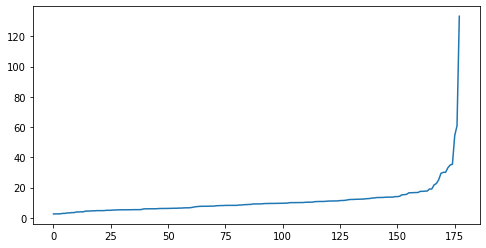

In [34]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) 
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (8,4) 
plt.plot(distances) 
plt.show()

In [35]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 40, min_samples = 4).fit(data)
labels = dbscan.labels_ 

In [36]:
from sklearn import metrics

In [37]:
print(metrics.silhouette_score(data,labels))

0.5609783563170826
